## K-Means Clustering

In [1]:
!pip install ../testclustering-0.1-py3-none-any.whl
!if [ ! -d ../.ans ]; then mkdir ../.ans; fi

Processing /projects/challenge/testclustering-0.1-py3-none-any.whl


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import scipy 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### DataSet

**Dataset Path:** ../dataset/CC GENERAL.csv

**In this scenario, Let us develop a customer segmentation for Credit Card Dataset Using K-Means Clustering.** The sample Dataset summarizes the usage behavior of about 8950 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

**CUST_ID** : Identification of Credit Card holder (Categorical)  
**BALANCE** : Balance amount left in their account to make purchases   
**BALANCE_FREQUENCY** : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)   
**PURCHASES** : Amount of purchases made from account   
**ONEOFF_PURCHASES** : Maximum purchase amount done in one-go   
**INSTALLMENTS_PURCHASES** : Amount of purchase done in installment   
**CASH_ADVANCE** : Cash in advance given by the user   
**PURCHASES_FREQUENCY** : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)    
**ONEOFFPURCHASESFREQUENCY** : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)      
**PURCHASESINSTALLMENTSFREQUENCY** : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)     
**CASHADVANCEFREQUENCY** : How frequently the cash in advance being paid   
**CASHADVANCETRX** : Number of Transactions made with "Cash in Advanced"    
**PURCHASES_TRX** : Numbe of purchase transactions made    
**CREDIT_LIMIT** : Limit of Credit Card for user      
**PAYMENTS** : Amount of Payment done by user     
**MINIMUM_PAYMENTS** : Minimum amount of payments made by user      
**PRCFULLPAYMENT** : Percent of full payment paid by user   
**TENURE** : Tenure of credit card service for user

### Reading and Understanding Data

In [5]:
#read csv data and store into dataframe
df =  pd.read_csv("../dataset/CC GENERAL.csv")

In [6]:
#take copy of original data 
df2 =  pd.read_csv("../dataset/CC GENERAL.csv")

In [7]:
#Find Shape
df.shape
#Analyse the Summary of the Dataset

(8950, 18)

In [8]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [10]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Data Cleaning
 
**Question 1:** Find the null values in the dataframe and replace with thier means

Assign the final cleaned DataFrame to the variable **`a1`**

In [11]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [12]:
df.CREDIT_LIMIT = df.CREDIT_LIMIT.fillna(value = df.CREDIT_LIMIT.mean())
df.MINIMUM_PAYMENTS = df.MINIMUM_PAYMENTS.fillna(value = df.MINIMUM_PAYMENTS.mean())

In [14]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [15]:
#Replace null with values with means

a1 = df.copy()

-----------

In [16]:
#drop customer id column
df = df.drop("CUST_ID", axis =1)

In [17]:
#Sort the data frame based on the column name
df = df.sort_index(axis = 1)

**Question 2:** Find all the variables contains outliers in the dataframe (Use: IQR Way)

Assign the all variable list to the variable **`a2`**

In [18]:
#Find the outliers
cols = df.columns.values.tolist()
iqr_score = {}
for c in cols:
    q1 = df[c].quantile(0.25)
    q3 = df[c].quantile(0.75)
    score = q3-q1
    outliers = df[(df[c]< q1 - 1.5*score)|(df[c]>q3+1.5*score)][c]
    iqr_score[c] = {"n_outliers": outliers.count()}
    
iqr_score = pd.DataFrame.from_dict(iqr_score,orient = 'index')
outlier_variables = iqr_score[iqr_score["n_outliers"]>0].index.tolist()
a2 = sorted(outlier_variables).copy()
#all the variables contains outliers  

Summary

- As you can see, There are many outliers. But, we can't simply drop the outliers as they may contain useful information. So, we'll treat them as extreme values (Because, most of the variables are currency based units).

- Already we know that outliers will effect the clusters. For now, we`ll do nothing with outliers because this may harm the clustering.

--------------

To avoid the outliers(Skewed data), Lets use 

- Log transformation



### Data Transformation

**Question 3:** Transform all variables in the dataframe and replace with log transform values. (Use: Natural Logrithmic $log(1+x)$)

Assign the final transformed DataFrame to the variable **`a3`**

In [19]:
#Transform all variables
#Log Transformation, log(1+x)
cols = df.columns.values.tolist()
for c in cols:
    df[c] = np.log(1+df[c])

a3 =  df.copy()

### Data Visualization

**Question 4:** Plot the graph it should show that how the data is distributed over the all Variable (Hint: Use Box Plot)   

<a href="../expected_img/expected_boxplot_outliers.png">Expected Boxplot</a>

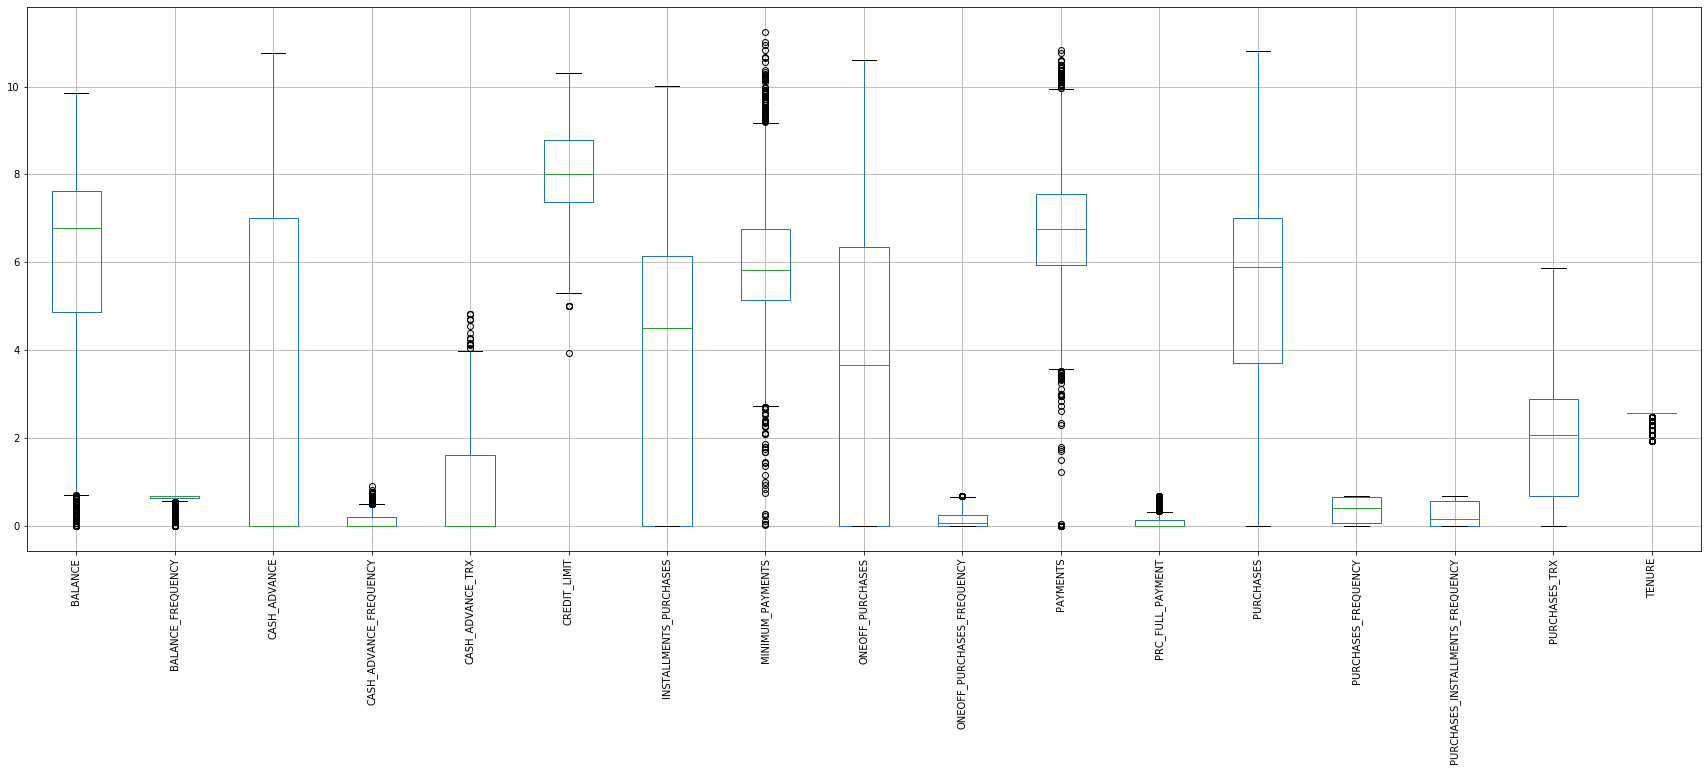

In [20]:
# Using boxplot for indentify possible outliers values after log-transform. (Note rotate the box plot into 90 degree)
### Don't remove any code given below. Enter your code in the appropriate section
f1, ax1 = plt.subplots(1,1, figsize = (30, 10))

### Enter code below
ax1 = df.boxplot(rot = 90)
plt.show()
### End code

**Note: Still data contains some outliers. Let it be, We aren't going change anything.**

### Feature Engineering and Selection

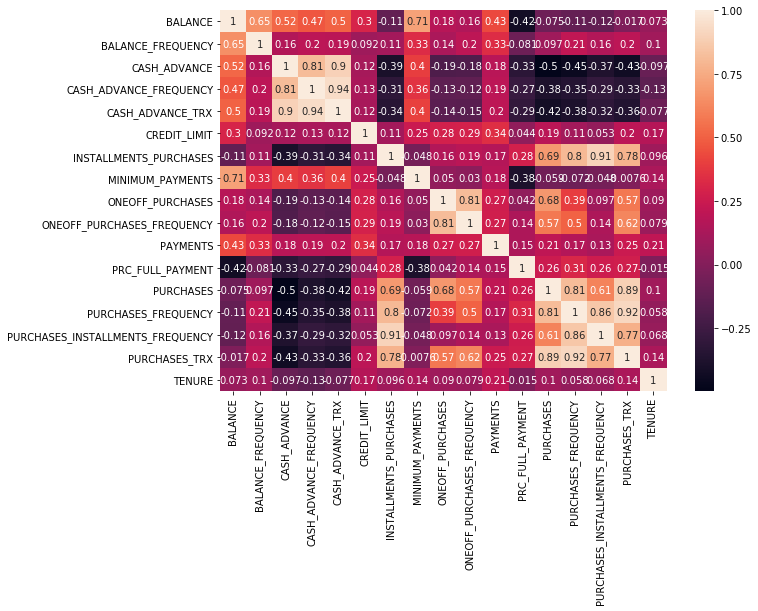

In [21]:
#Plot Heatmap and See correlation between variables
plt.figure(figsize=(10,7))

sns.heatmap(data = df.corr(), annot= True)

**Question 5**: Find out the highly correlated variables each other. Find all variable pairs that have greater than a **0.7** correlation coefficient.

Ex: If (X,Y) correlation coefficient is 0.7 and (X,Z) correlation coefficient is 0.7 then store [X, Y, Z] only. Second correlation has X, Z but X is already highly correlated with Y. So, Don't Repeat X again.

Assign the correlated variables as list to the variable **`a4`**

In [22]:
col_corr = []
corr_matrix = df.corr()
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        if((corr_matrix.iloc[i, j] >= 0.7) and (corr_matrix.columns[j] not in col_corr) and (corr_matrix.iloc[i, j] !=1)):
            colname = corr_matrix.columns[i]
            colname1 = corr_matrix.columns[j]
            col_corr.append(colname)
            col_corr.append(colname1)
print(col_corr)

['BALANCE', 'MINIMUM_PAYMENTS', 'CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'INSTALLMENTS_PURCHASES', 'PURCHASES_FREQUENCY', 'INSTALLMENTS_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'INSTALLMENTS_PURCHASES', 'PURCHASES_TRX', 'ONEOFF_PURCHASES', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_FREQUENCY', 'PURCHASES']


In [35]:
col_corr_set = set(col_corr)
unique_list = (list(col_corr_set))
unique_list.sort()

In [36]:
#Find all variable pairs that have greater than a **0.7** correlation coefficient. (Use: corr function)

a4 = unique_list

In [37]:
a4

['BALANCE',
 'CASH_ADVANCE',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'INSTALLMENTS_PURCHASES',
 'MINIMUM_PAYMENTS',
 'ONEOFF_PURCHASES',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES',
 'PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'PURCHASES_TRX']

**Standardization**

In [26]:
X = df[['BALANCE',
 'CASH_ADVANCE',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'INSTALLMENTS_PURCHASES',
 'MINIMUM_PAYMENTS',
 'ONEOFF_PURCHASES',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES',
 'PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'PURCHASES_TRX']] 

In [27]:
# Select those best features and store into seperate variable `X`

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
#Let us do Standardization for selected features and store into seperate variable


**Question 6**   
i) Find the optimal cluster `n`. Take a range from (1, 20) from which n is optimal cluster for K-Means Clustering. Set `random_state=42` while build cluster. **(Use Elbow Method)**   
ii) Plot the graph which show how SSE square decrease when n clusters increased. (Use line plot)

Assign optimal cluster `n` value as int to the variable **`a5`** 

<a href="../expected_img/expected_lineplot_elbow.png">Expected Line Plot (Elbow Method)</a>

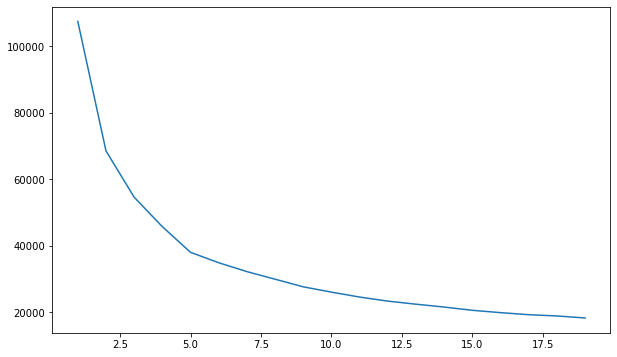

In [28]:
# Use the Elbow method to find a good number of clusters using WCSS
### Don't remove any code given below. Enter your code in the appropriate section
# Use init="k-means++", n_init=10, max_iter=300, random_state=42 as attributes for kmeans
f2, ax2 = plt.subplots(1, 1, figsize = (10, 6))
wcss = []
X = scaled_data
for ii in range(1,20):
    kmeans = KMeans(n_clusters = ii,init="k-means++", n_init=10, max_iter=300, random_state = 42)
    kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)

### Enter code below
ax2 = sns.lineplot(y = wcss, x = list(range(1,20)))
plt.show()
### End code

a5 = 5

----------

### Clustering

In [29]:
# Create Kmeans Clustering based on optimal cluster `n` value
# Use init="k-means++", n_init=10, max_iter=300, random_state=42 as attributes for kmeans
kmean = KMeans(n_clusters = 5, init = "k-means++", n_init = 10, max_iter = 300, random_state = 42)
kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [30]:
#Create a new column and append clustered labels into original dataframe (Copied orginal dataframe)
labels = kmean.labels_
cluster = pd.concat([df2.iloc[:,1:], pd.DataFrame({'cluster':labels})],axis =1)
cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


### Interpretation of clusters

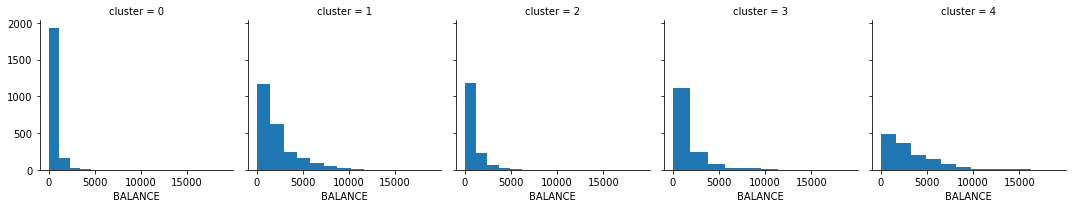

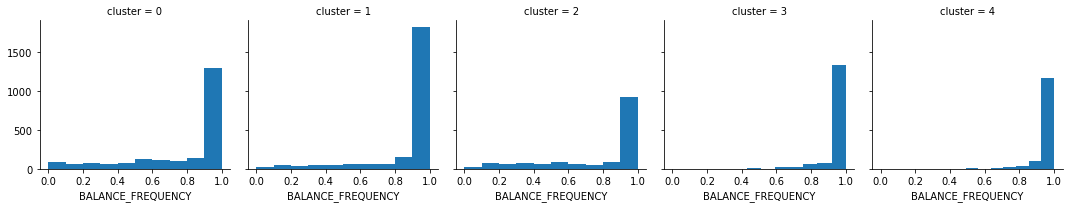

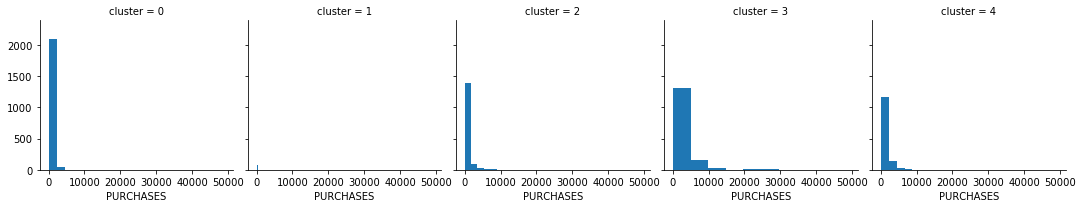

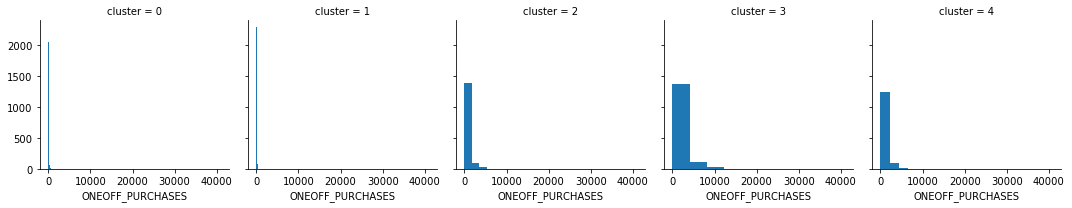

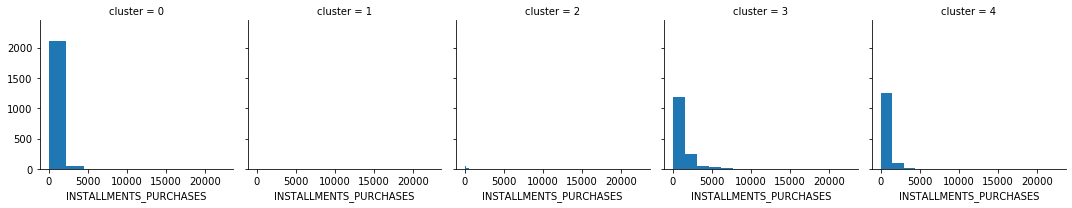

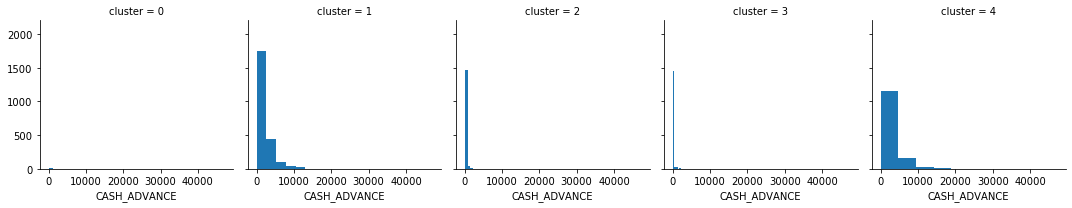

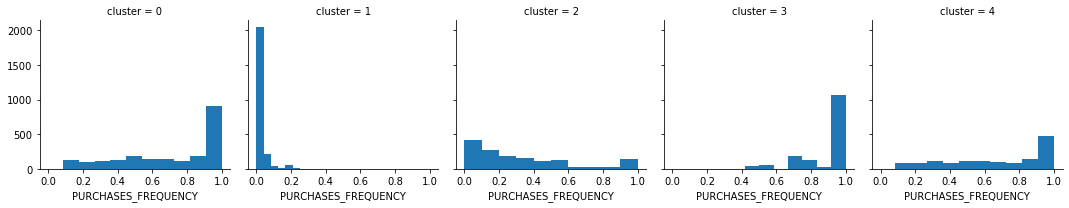

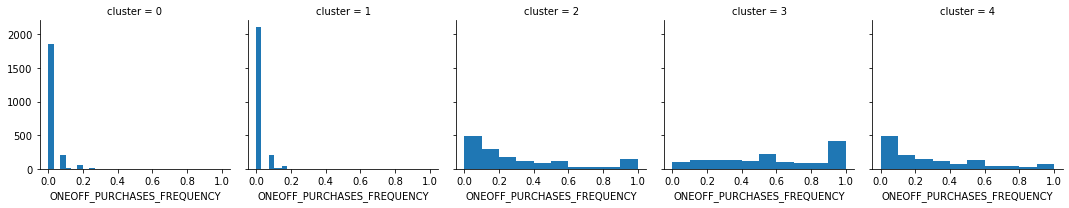

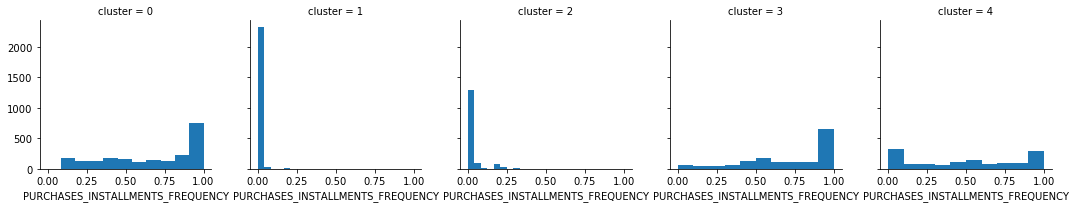

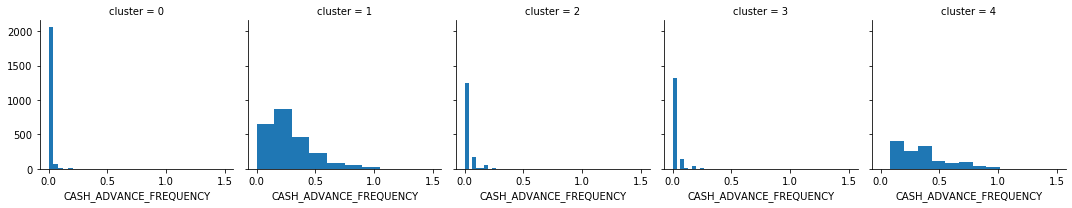

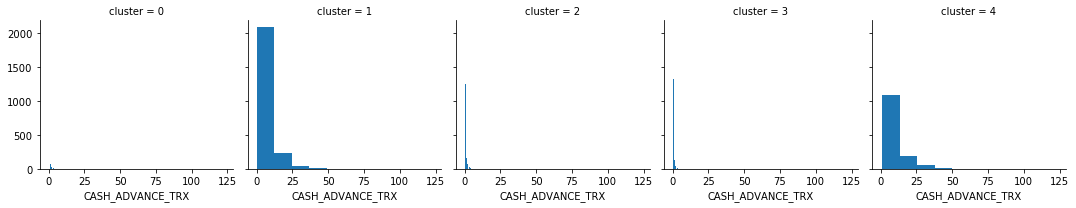

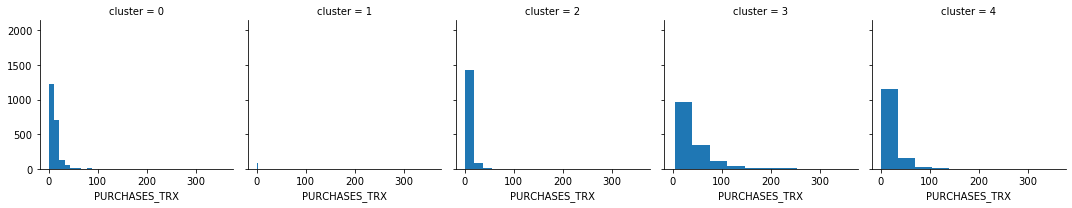

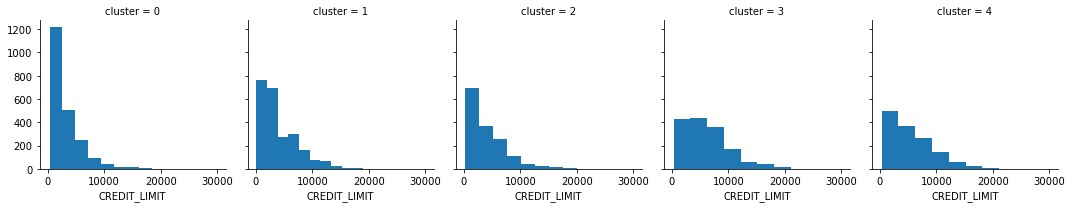

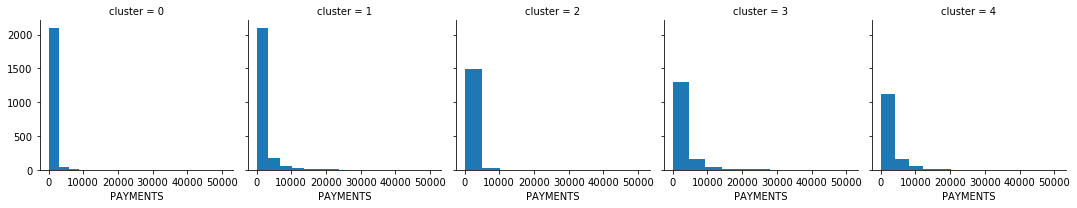

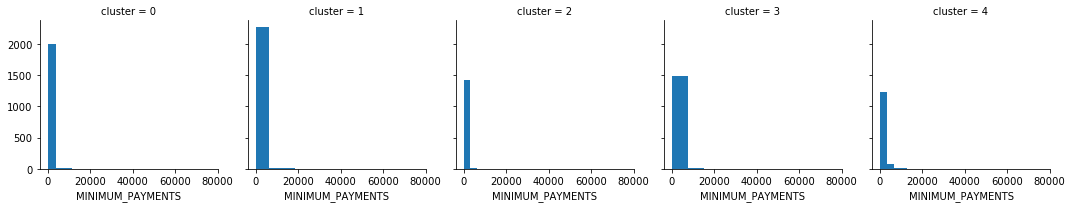

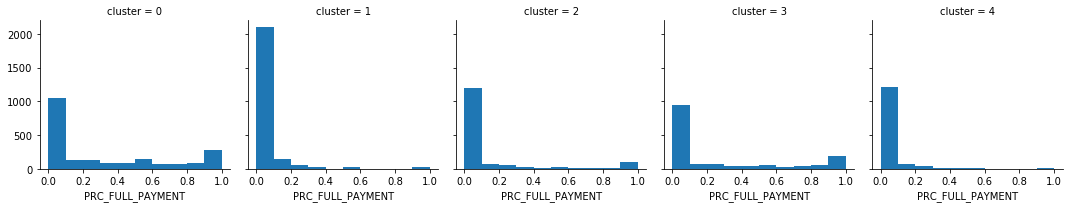

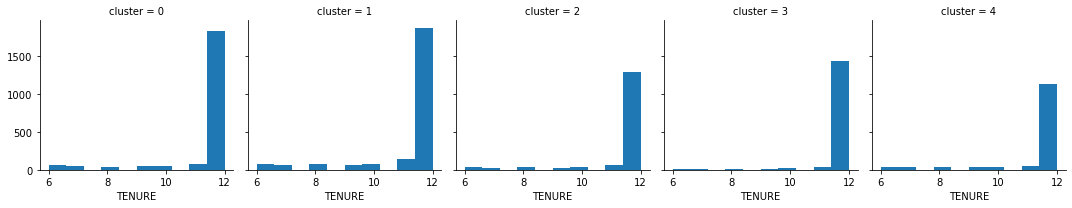

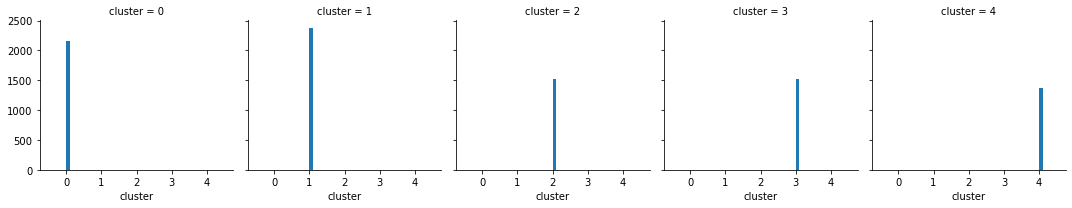

In [31]:
#Plot Facet Grid for each cluster.
for c in cluster:
    grid = sns.FacetGrid(cluster, col ='cluster')
    grid.map(plt.hist, c)

**Question 7**  

Find Appropriate Cluster    

1) In which cluster, The people are less interest to purchase using CC. The people mainting very good balance and frequently taking advance cash option.      
2) In Which cluster, The people are average interest to purchase using CC and. The people mainting very low balance and very low interested taking advance cash option. Average Payment CC Bills. They are average interest one go purchase

For ex: If answer is cluster 0 then assign the value 0 to the mentioned variables below.     

Assign Question 1 cluster label value as int to the variable `a6`   
Assign Question 2 cluster label value as int to the variable `a7`

In [32]:
a6, a7 = 1,0

--------

###  Run the below cells to save your answers

In [38]:
from testclustering import kmeans as kmeanstest
kmeanstest.save_question1(a1)
kmeanstest.save_question2(a2)
kmeanstest.save_question3(a3)
kmeanstest.save_question4(f1)
kmeanstest.save_question5(a4)
kmeanstest.save_question6(a5, f2)
kmeanstest.save_question7(a6, a7)